In [1]:
# Import from libraries.
from numpy import empty, zeros, max, linspace, meshgrid # Import any other math functions you need here.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Charge density function.
def rho(x,y):
    rho = 0
    return rho


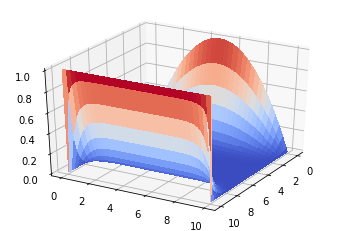

In [10]:


# Set constants.
M = 100 # Number of grid squares on a side.
Vtop = 1.0 # Voltage at top boundary.
Vbottom = 1.0 # Voltage at bottom boundary.
Vleft = 0.0 # Voltage at left boundary.
Vright = 0.0 # Voltage at right boundary.

xmin = 0 # Starting value of x & y.
xmax = 10 # Ending value of x & y.
dx = (xmax-xmin)/M # Step size. Don't need to change.

# Create arrays to hold potential values and points.
phi = zeros([M+1,M+1],float) # Current guess for potential.
phiprime = empty([M+1,M+1],float) # Next guess for potential.
xlist = linspace(xmin,xmax,M+1) # List of x-coordinates.
ylist = linspace(xmin,xmax,M+1) # List of y-coordinates.

# Set constant boundary conditions.
# Left edge, where i = 0 is fixed.
phi[0,:] = Vleft
# Right edge, where i = M is fixed.
phi[M,:] = Vright
# Bottom edge, where j = 0 is fixed.
phi[:,0] = Vbottom
# Top edge, where j = M is fixed.
phi[:,M] = Vtop

# If you need to set up a funciton along one of the edges,
# follow this example. It sets up V(x,0) = xmax*x-x**2 along 
# the bottom edge. This is just a function picked for demonstration.
# Use phi[i,0] for the bottom edge, phi[i,M] for the top edge,
# phi[0,j] for the left edge, and phi[M,j] for the right edge.
for i in range(0,M+1):
    phi[i,0] = (xmax*xlist[i]-xlist[i]**2)*4/xmax**2

target = 1e-3*max(phi) # Target accuracy, scaled by problem.

# Main loop
delta = 1.0 # Current error between phi and phiprime.
while delta > target: # Repeat until error is lower than target accuracy.
    # Calculate new values of the potential.
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M: # Endpoitns stay fixed.
                phiprime[i,j] = phi[i,j]
            else:
                # Calculate next guess based on difference equation.
                phiprime[i,j] = (phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4 + dx**2/4*rho(xlist[i],ylist[j])
    # Calculate maximum difference from old values.
    delta = max(abs(phi-phiprime))
    # Swap the two arrays.
    phi,phiprime = phiprime,phi

# Turn lists into a format that matplotlib wants.
X, Y = meshgrid(xlist, ylist)

# Set viewing angle for graph.
angle = 30

# Create figure and plot.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, phi, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30, angle)
plt.draw()

# Need a different view? Change new_angle (in degrees) in the next cell and run it. 
# Then you can regraph your results without having to re-run the computation.

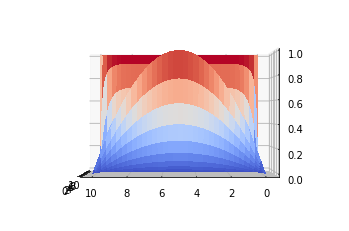

In [12]:
# Set new angle, in degrees.
new_angle = 180

# Create new figure and plot.
new_fig = plt.figure()
new_ax = new_fig.add_subplot(111, projection='3d')
new_surf = new_ax.plot_surface(X, Y, phi, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
new_ax.view_init(0, new_angle)
plt.draw()